In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential, metrics
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, MaxPooling2D, Dropout, Flatten, UpSampling2D, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_data = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
test_data = ImageDataGenerator(rescale = 1./255)

train_set = train_data.flow_from_directory('./jpg/train', batch_size = 8, class_mode = 'input')
test_set = test_data.flow_from_directory('./jpg/test', batch_size = 8, class_mode = 'input', shuffle = False)

Found 6552 images belonging to 1 classes.
Found 1637 images belonging to 1 classes.


In [9]:
train_set.batch_size

8

In [4]:
model = Sequential()

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())    #256*256*64

model.add(Conv2D(32, (3,3), strides = 2, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())   #128*128*32
model.add(Conv2D(32, (3,3), strides = 2, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())   #64*64*32
model.add(Conv2D(32, (3,3), strides = 2, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())   #32*32*32

model.add(UpSampling2D())  #64*64*32
model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(UpSampling2D())  #128*128*32
model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(UpSampling2D())  #256*256*32

model.add(Conv2D(3, (1, 1) , activation='sigmoid', padding='same'))  #256*256*3

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9

In [6]:
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'mse')
bar = tf.keras.callbacks.ProgbarLogger()

In [10]:
with tf.device('/gpu:0'):
    model.fit_generator(train_set,
                        validation_data = test_set,
                        steps_per_epoch = 100,
                        verbose = 1,
                        callbacks = [bar],
                        epochs = 1000,
                        validation_steps=100)

100/100 [==============================] - 38s 382ms/step - loss: 0.0068 - accuracy: 0.7738 - val_loss: 0.0063 - val_accuracy: 0.8341


In [42]:
decoded = model.predict(test_set)

In [53]:
model.save('autoenc_flowers')

In [2]:
from tensorflow.keras.models import load_model

In [3]:
dec = load_model('autoenc_flowers')

In [8]:
decoded = dec.predict(test_set)

<function matplotlib.pyplot.show(*args, **kw)>

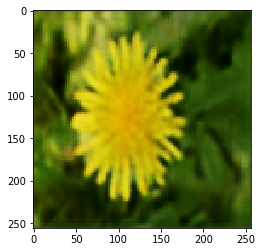

In [10]:
import matplotlib.pyplot as plt
plt.imshow(decoded[0])
plt.show